In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from tensorflow import keras

from tensorflow.keras.preprocessing import text_dataset_from_directory
from tensorflow.strings import regex_replace
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from keras.layers import Dense, SimpleRNN, RNN, LSTM,Dropout,Bidirectional,Attention,Embedding,BatchNormalization
from keras.optimizers import Adam,SGD,RMSprop,schedules
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load dataset
dataframe = pd.read_csv("hack.csv", header=None)
# convert to numpy
dataset = dataframe.values
# split into input (X) and output (Y) variables, skip Header row
# [1:,0-8] ; [1:,8] skips 1. row if table has a header
#X = dataset[1:,0:8]
#Y = dataset[1:,8].astype(float)
X = dataset[:,0:8]
Y = dataset[:,8].astype(float)

In [ ]:
X

In [3]:
enc=OneHotEncoder()
enc.fit(X)
xhot = enc.transform(X).toarray()
#xhot = OneHotEncoder().fit_transform(X).toarray()

In [ ]:
xhot[0].shape[0]
#enc.categories_
#xhot[0]

In [4]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
y_train = scaler.fit_transform(Y.reshape(-1, 1))


In [5]:
x_train=xhot
#Convert the x_train and y_train to numpy arrays, Keras needs it for model.fit 
x_train, y_train = np.array(x_train), np.array(y_train)

In [6]:
FC = Sequential()
FC.add(Dense(xhot[0].shape[0], activation='relu', input_shape=[xhot[0].shape[0]]))
FC.add(Dropout(0.6))
FC.add(Dense(xhot[0].shape[0]/2,activation='relu'))
FC.add(Dropout(0.6))
FC.add(Dense(xhot[0].shape[0]/4, activation='relu'))
FC.add(Dropout(0.6))
FC.add(Dense(1, activation='linear'))

In [ ]:
FC.summary()

In [7]:
#Compile the model
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.95)
#opt = RMSprop(learning_rate=lr_schedule)
opt = SGD(learning_rate=lr_schedule)
FC.compile(optimizer=opt, loss='mean_squared_error')

In [9]:
#Train the model
FC_info=FC.fit(x_train, y_train, batch_size=1, epochs=200,verbose=1, shuffle=False, validation_split=0.1)

Epoch 1/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0194 - val_loss: 0.0154
Epoch 2/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0192 - val_loss: 0.0152
Epoch 3/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0192 - val_loss: 0.0154
Epoch 4/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0185 - val_loss: 0.0145
Epoch 5/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0181 - val_loss: 0.0140
Epoch 6/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0178 - val_loss: 0.0137
Epoch 7/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0178 - val_loss: 0.0131
Epoch 8/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0177 - val_loss: 0.0123
Epoch 9/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0167 - val_loss: 0.0117
Epoch 10/200
2229/2229 [==============================] - 8s 4ms/step - l

Epoch 80/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0091 - val_loss: 0.0050
Epoch 81/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0084 - val_loss: 0.0047
Epoch 82/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0086 - val_loss: 0.0049
Epoch 83/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 84/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0085 - val_loss: 0.0050
Epoch 85/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0083 - val_loss: 0.0047
Epoch 86/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0082 - val_loss: 0.0048
Epoch 87/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0084 - val_loss: 0.0051
Epoch 88/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0077 - val_loss: 0.0046
Epoch 89/200
2229/2229 [==============================] - 8s 4ms

2229/2229 [==============================] - 8s 4ms/step - loss: 0.0071 - val_loss: 0.0042
Epoch 159/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0069 - val_loss: 0.0045
Epoch 160/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 161/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 162/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0072 - val_loss: 0.0046
Epoch 163/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 164/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0068 - val_loss: 0.0045
Epoch 165/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0070 - val_loss: 0.0042
Epoch 166/200
2229/2229 [==============================] - 8s 4ms/step - loss: 0.0077 - val_loss: 0.0044
Epoch 167/200
2229/2229 [==============================] - 8s 4ms/ste

In [10]:
pred_prices=FC.predict(x_train)
pred_prices = scaler.inverse_transform(pred_prices)
#pred_prices

In [ ]:
X

In [11]:
price_err=100*((pred_prices-Y)/Y)

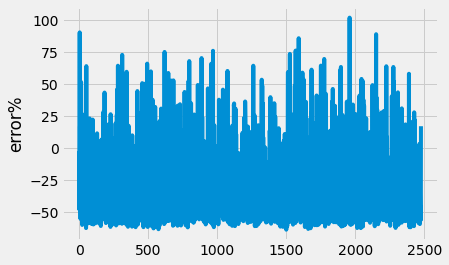

In [12]:
plt.plot(price_err[:,0])
plt.ylabel('error%')
plt.show()